#LSTM (Long Short-Term Memory) Project


**ABOUT THE DATA**


Attribute Information:

1.date: Date in format dd/mm/yyyy

2.time: time in format hh:mm:ss

3.global_active_power: household global minute-averaged active power (in kilowatt). Global active power is the power consumed by appliances other than the appliances mapped to Sub Meters. Global active power is the real power consumption i.e. the power consumed by electrical appliances other than the sub metered appliances.It is basically called wattfull power.

4.global_reactive_power: household global minute-averaged reactive power (in kilowatt). Global reactive power is the power which bounces back and froth without any usage or leakage. It is the imaginary power consumption. It is basically called wattless power.

5.voltage: minute-averaged voltage (in volt)

6.global_intensity: household global minute-averaged current intensity (in ampere). Intensity is magnitude of the power consumed. Also called as strength of current.

7.sub_metering_1: energy sub-metering No. 1 (in watt-hour of active energy). It corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powered).

8.sub_metering_2: energy sub-metering No. 2 (in watt-hour of active energy). It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light.

9.sub_metering_3: energy sub-metering No. 3 (in watt-hour of active energy). It corresponds to an electric water-heater and an air-conditioner.




**METHOD**

* Cleaning the Data and Change it to hourly basis
* Data is splitted into **(70%, 20%, 10%)**  for the training, validation, and test sets
* Apply LSTM and forecast data

**IMPORTING MODULES AND DATA**

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

# importing data
df = pd.read_csv('household_power_consumption.txt', sep=';', 
                 parse_dates={'Datetime' : ['Date', 'Time']}, infer_datetime_format=True, 
                 low_memory=False, na_values=['nan','?']) #, index_col='Datetime'

df.head()

ModuleNotFoundError: No module named 'pandas'

In [ ]:
print(len(df))
df.info()
# Resampling by hours
df_hour = df[df.Datetime.dt.minute==0]
# Setting Datetime as Index
df_hour = df_hour.set_index(['Datetime'])
print(len(df_hour))
df_hour.info()

2075259
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 8 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Datetime               datetime64[ns]
 1   Global_active_power    float64       
 2   Global_reactive_power  float64       
 3   Voltage                float64       
 4   Global_intensity       float64       
 5   Sub_metering_1         float64       
 6   Sub_metering_2         float64       
 7   Sub_metering_3         float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 126.7 MB
34588
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 34588 entries, 2006-12-16 18:00:00 to 2010-11-26 21:00:00
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Global_active_power    34152 non-null  float64
 1   Global_reactive_power  34152 non-null  float64
 2   Voltage                3415

In [ ]:
df_hour.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Datetime,,,,,,,
2006-12-16 18:00:00,2.790,0.180,237.52,11.8,0.0,0.0,18.0
2006-12-16 19:00:00,4.070,0.088,231.99,17.4,0.0,1.0,17.0
2006-12-16 20:00:00,3.206,0.078,232.43,13.8,0.0,0.0,16.0
2006-12-16 21:00:00,3.314,0.072,236.76,14.0,0.0,0.0,17.0
2006-12-16 22:00:00,3.464,0.170,236.03,14.6,0.0,1.0,17.0


**DATA CLEANING AND IMPUTING**

In [ ]:
# dropping the empty rows
df_hour = df_hour.dropna()
print(len(df_hour))
print(df_hour.isnull().sum())

34152
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64


**DATA VISUALIZATION AND CORRELATIONS**

In [ ]:
df_hour['hour'] = df_hour.index.strftime('%H')
df_hour['month'] = df_hour.index.strftime('%m')

df_hour.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,hour,month
Datetime,,,,,,,,,
2006-12-16 18:00:00,2.790,0.180,237.52,11.8,0.0,0.0,18.0,18,12
2006-12-16 19:00:00,4.070,0.088,231.99,17.4,0.0,1.0,17.0,19,12
2006-12-16 20:00:00,3.206,0.078,232.43,13.8,0.0,0.0,16.0,20,12
2006-12-16 21:00:00,3.314,0.072,236.76,14.0,0.0,0.0,17.0,21,12
2006-12-16 22:00:00,3.464,0.170,236.03,14.6,0.0,1.0,17.0,22,12


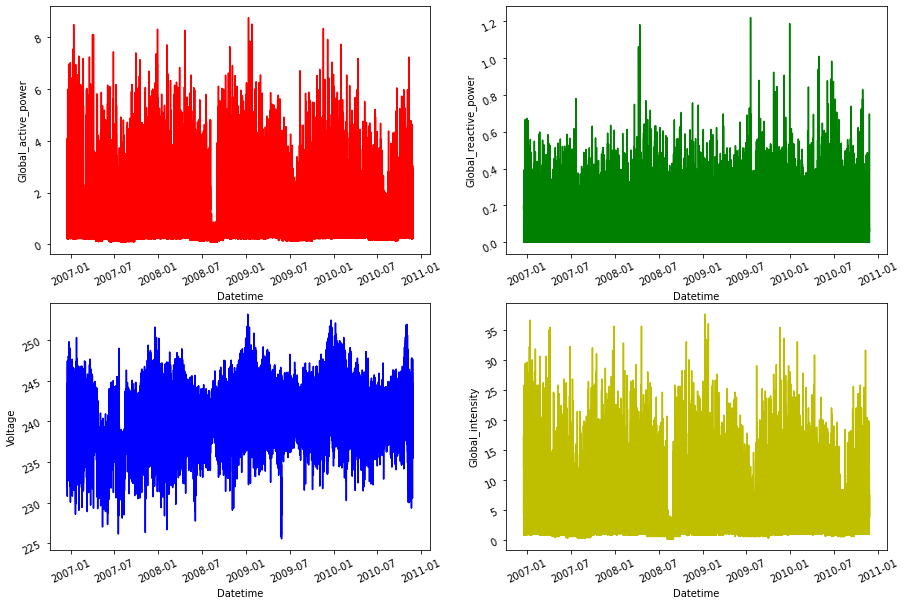

In [ ]:
fig,ax =  plt.subplots( 2, 2,
                       figsize = ( 15, 10))
  
sns.lineplot( x = df_hour.index, y = "Global_active_power", 
             color = 'r', data = df_hour, 
             ax = ax[0][0])
ax[0][0].tick_params(labelrotation = 25)

sns.lineplot( x = df_hour.index, y = "Global_reactive_power", 
             color = 'g', data = df_hour,
             ax = ax[0][1])
ax[0][1].tick_params(labelrotation = 25)

sns.lineplot(x = df_hour.index, y = "Voltage", 
             color = 'b', data = df_hour,
             ax = ax[1][0])
ax[1][0].tick_params(labelrotation = 25)
  
sns.lineplot(x = df_hour.index, y = "Global_intensity", 
             color = 'y', data = df_hour, 
             ax = ax[1][1])
ax[1][1].tick_params(labelrotation = 25)

The graph above sbove plot shows the sesonality of the data.

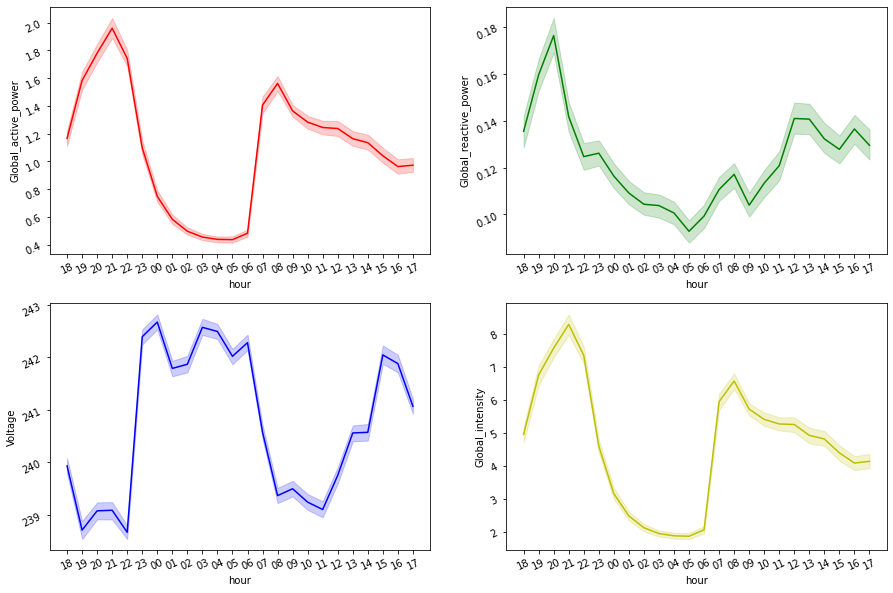

In [ ]:
# Visualizations across hours 
fig,ax =  plt.subplots( 2, 2,
                       figsize = ( 15, 10))

sns.lineplot(x=df_hour['hour'], y=df_hour['Global_active_power'], ax = ax[0][0], color='r')
ax[0][0].tick_params(labelrotation = 25)

sns.lineplot(x=df_hour['hour'], y=df_hour['Global_reactive_power'], ax = ax[0][1], color='g')
ax[0][1].tick_params(labelrotation = 25)

sns.lineplot(x=df_hour['hour'], y=df_hour['Voltage'], ax = ax[1][0], color='b')
ax[1][0].tick_params(labelrotation = 25)

sns.lineplot(x=df_hour['hour'], y=df_hour['Global_intensity'], ax = ax[1][1], color='y')
ax[1][1].tick_params(labelrotation = 25)
plt.show()

This plot is similar to the previous plot but is  done based on an hourly basis in our to visualize our seasonality.
We can observe a majority of the plots having two peaks. 
A major takeaway from the plots are the actual household usage (Global active Power), which has two peaks and majorly between 19:00 - 21:00 and 7:00 - 9:00

In [ ]:
df_hour.corr()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Global_active_power,1.000000,0.247029,-0.403271,0.998878,0.473477,0.439703,0.639893
Global_reactive_power,0.247029,1.000000,-0.110569,0.266094,0.129082,0.141363,0.092856
Voltage,-0.403271,-0.110569,1.000000,-0.414890,-0.199118,-0.162585,-0.270334
Global_intensity,0.998878,0.266094,-0.414890,1.000000,0.478781,0.444861,0.627771
Sub_metering_1,0.473477,0.129082,-0.199118,0.478781,1.000000,0.047073,0.096693
Sub_metering_2,0.439703,0.141363,-0.162585,0.444861,0.047073,1.000000,0.080226
Sub_metering_3,0.639893,0.092856,-0.270334,0.627771,0.096693,0.080226,1.000000


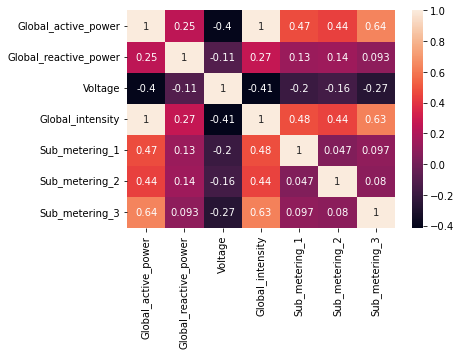

In [ ]:
sns.heatmap(df_hour.corr(), annot=True)
plt.show()

**DATA SPLITTING AND PREPARATION**

In [ ]:
column_indices = {name: i for i, name in enumerate(df_hour.columns)}
print(column_indices)

# Splitting our Data
n = len(df_hour)
train_df = df_hour[0:int(n*0.7)]
val_df = df_hour[int(n*0.7):int(n*0.9)]
test_df = df_hour[int(n*0.9):]

# Get the number of columns
print(train_df.shape, val_df.shape, test_df.shape)

{'Global_active_power': 0, 'Global_reactive_power': 1, 'Voltage': 2, 'Global_intensity': 3, 'Sub_metering_1': 4, 'Sub_metering_2': 5, 'Sub_metering_3': 6, 'hour': 7, 'month': 8}
(23906, 9) (6830, 9) (3416, 9)


In [ ]:
# Function to create sliding Window
def create_data_window(dataset, time_step):
    X, y = [], []
    for i in range(len(dataset)):
        # find the end of this pattern
        end_ix = i + time_step
        # check if we are beyond the dataset
        if end_ix > len(dataset):
            break
        seq_x, seq_y = dataset[i:end_ix, 1:], dataset[end_ix-1, 0]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [ ]:
# Data Normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# To scale 3 dimensional data 
train_X = scaler.fit_transform(train_X.reshape(-1, train_X.shape[-1])).reshape(train_X.shape)
val_X = scaler.transform(val_X.reshape(-1, val_X.shape[-1])).reshape(val_X.shape)
test_X = scaler.transform(test_X.reshape(-1, test_X.shape[-1])).reshape(test_X.shape)
print(train_X[0][0], val_X[0][0], test_X[0][0])
print(train_X.shape, val_X.shape, test_X.shape)

[0.14778325 0.43358668 0.31016043 0.         0.         0.58064516
 0.7826087  1.        ] [0.16256158 0.48968512 0.29946524 0.475      0.01333333 0.
 0.73913043 0.72727273] [0.19376026 0.4679696  0.24064171 0.         0.         0.38709677
 0.95652174 0.45454545]
(23883, 24, 8) (6807, 24, 8) (3393, 24, 8)


**MODEL BUILDING**

In [ ]:
# Importing Required modules
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM

In [ ]:
model=Sequential()
model.add(LSTM(100,return_sequences=True, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(LSTM(75,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1024))
model.add(Dropout(0.2))
model.add(Dense(512))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 24, 100)           43600     
                                                                 
 lstm_7 (LSTM)               (None, 24, 75)            52800     
                                                                 
 lstm_8 (LSTM)               (None, 50)                25200     
                                                                 
 dense_6 (Dense)             (None, 1024)              52224     
                                                                 
 dropout_4 (Dropout)         (None, 1024)              0         
                                                                 
 dense_7 (Dense)             (None, 512)               524800    
                                                                 
 dropout_5 (Dropout)         (None, 512)              

In [ ]:
# Model Training
Epoch = 20
batch_size = 64
history = model.fit(train_X, train_y, epochs=Epoch, batch_size=batch_size, validation_data=(val_X, val_y), verbose=1, shuffle=False)

Epoch 1/20
374/374 [==============================] - 48s 103ms/step - loss: 1.1001 - val_loss: 0.6642
Epoch 2/20
374/374 [==============================] - 36s 95ms/step - loss: 0.1301 - val_loss: 0.0518
Epoch 3/20
374/374 [==============================] - 39s 105ms/step - loss: 0.0202 - val_loss: 0.0066
Epoch 4/20
374/374 [==============================] - 37s 99ms/step - loss: 0.0081 - val_loss: 0.0096
Epoch 5/20
374/374 [==============================] - 37s 99ms/step - loss: 0.0084 - val_loss: 0.0147
Epoch 6/20
374/374 [==============================] - 41s 110ms/step - loss: 0.0086 - val_loss: 0.0095
Epoch 7/20
374/374 [==============================] - 37s 99ms/step - loss: 0.0083 - val_loss: 0.0081
Epoch 8/20
374/374 [==============================] - 37s 99ms/step - loss: 0.0082 - val_loss: 0.0082
Epoch 9/20
374/374 [==============================] - 42s 111ms/step - loss: 0.0062 - val_loss: 0.0040
Epoch 10/20
374/374 [==============================] - 38s 102ms/step - loss: 

**MODEL EVALUATION**

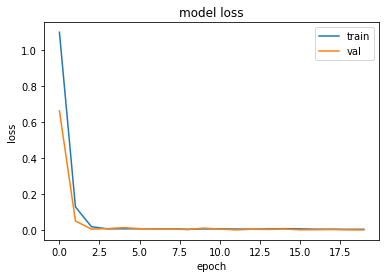

In [ ]:
# Loss history plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

From the plot above we can see the losses of both the training and validation data.

In [ ]:
# Predicting on our Test data
test_predict=model.predict(test_X)
test_predict.shape, test_y.shape

107/107 [==============================] - 4s 16ms/step


((3393, 1), (3393,))

In [ ]:
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(test_y,test_predict))
rmse_watts = rmse*1000
print('Test RMSE: %.3f' % rmse+'KW')
print('Test RMSE: %.3f' % rmse_watts+'W')

Test RMSE: 0.043KW
Test RMSE: 43.034W


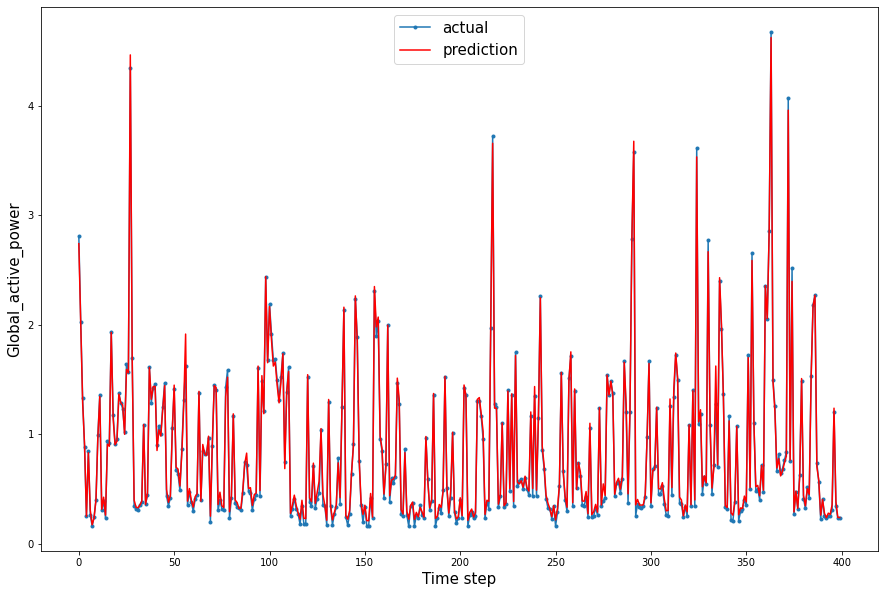

In [ ]:
aa=[x for x in range(400)]
plt.figure(figsize=(15,10))
plt.plot(aa, test_y[:400], marker='.', label="actual")
plt.plot(aa, test_predict[:400], 'r', label="prediction")
plt.ylabel('Global_active_power', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show()

The plot shows our actual test values and our prediction values over the first 400 hours on our test data which shows that the LSTM model performs very well. 

**end**